In [1]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
import texttable as tt

### Tratando os arquivos

In [2]:
class Amostra:
    
    def __init__(self, filename):
        if (filename is None or len(filename) == 0):
            raise Exception('Parâmetro com nome do arquvio csv de amostra é obrigatório!')
        self._csv = pd.read_csv(filename)
        # dividindo todos valores por 100
        self._csv["Valor Parcela"] = self._csv["Valor Parcela"].map(lambda x : float(x) / 100)
        self.ufs = {}
        self.municipios = {}
        self.classes = {}
        self._setUfs()
        self._setMunicipios()
        self._setClasses()
        
    def _setUfs(self):
        for i in range(len(self._csv)):
            uf = self._csv.UF[i]
            nomeMunicipio = self._csv["Nome Municipio"][i]
            if uf not in self.ufs:
                self.ufs[uf] = []
            if nomeMunicipio not in self.ufs[uf]:
                self.ufs[uf].append(nomeMunicipio)
        return 0
    
    def _setMunicipios(self):
        for i in range(len(self._csv)):
            nomeMunicipio = self._csv["Nome Municipio"][i]
            valorParcela = self._csv["Valor Parcela"][i]
            if nomeMunicipio not in self.municipios:
                self.municipios[nomeMunicipio] = []
            self.municipios[nomeMunicipio].append(valorParcela)
    
    def _setClasses(self):
        # self.classes = {(0, 99): [ qtdPessoas, freqAcc, medIntervalo, medClasse ]}
        for i in range(0, 1000, 100): self.classes[(i, i+99)] = [0, 0, (i + i+99)/2, 0]
        for municipio in self.municipios:
            for valor in self.municipios[municipio]:
                anterior = None
                for intervalo in self.classes:
                    if self._isBetween(intervalo, valor):
                        self.classes[intervalo][0] += 1 # atdPessoas
                        ############ freqAcc ###################################################################
                        if anterior is not None:
                            self.classes[intervalo][1] = self.classes[intervalo][0] + self.classes[anterior][1]
                        else:
                            self.classes[intervalo][1] += 1
                        ########################################################################################
                        self.classes[intervalo][3] = np.average([self.classes[intervalo][3], valor]) # medClasse
                        break
                    anterior = intervalo
    
    # Verifica se o valor está dentro do intervalo
    def _isBetween(self, intervalo, valor):
        return valor >= intervalo[0] and valor <= intervalo[1]

### Criando tabela de frequência e histograma com dados csv

+------------+--------------------+------------+
| Intervalo  | Média do intervalo | Frequência |
+============+====================+============+
| (0, 99)    | 49.500             | 248841     |
+------------+--------------------+------------+
| (100, 199) | 149.500            | 444070     |
+------------+--------------------+------------+
| (200, 299) | 249.500            | 232564     |
+------------+--------------------+------------+
| (300, 399) | 349.500            | 76786      |
+------------+--------------------+------------+
| (400, 499) | 449.500            | 30297      |
+------------+--------------------+------------+
| (500, 599) | 549.500            | 11625      |
+------------+--------------------+------------+
| (600, 699) | 649.500            | 2756       |
+------------+--------------------+------------+
| (700, 799) | 749.500            | 987        |
+------------+--------------------+------------+
| (800, 899) | 849.500            | 432        |
+------------+------

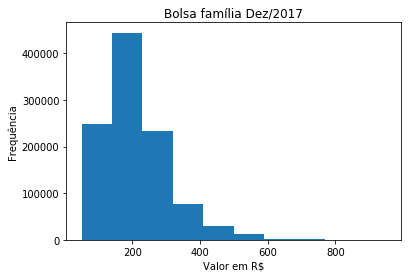

In [3]:
# Dados da amostra
amostra = Amostra('dezembro.csv')

# Dados para montar o histograma
data = []
tabela = tt.Texttable()
tabela.header(['Intervalo', 'Média do intervalo', 'Frequência'])

for intervalo in amostra.classes:
    i = 0
    for n in [amostra.classes[intervalo][2]] * amostra.classes[intervalo][0]:
        data.append(n)
        i+=1
    tabela.add_row([intervalo, amostra.classes[intervalo][2], i])


# Instanciando histograma
plt.hist(data)

# Exibindo tabela de frequência
print(tabela.draw())

# Exibindo histograma
plt.title("Bolsa família Dez/2017")
plt.xlabel("Valor em R$")
plt.ylabel("Frequência")
plt.show()

### Criando boxplot

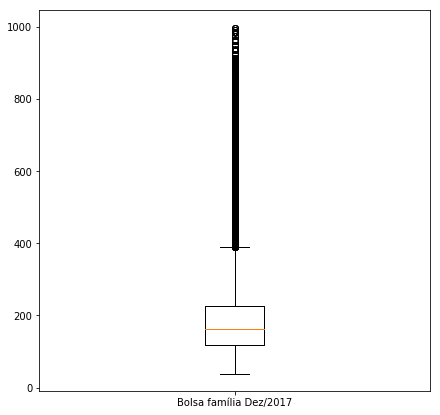

In [4]:
# Dados do box plot
data_to_plot = amostra._csv["Valor Parcela"]

# Instanciando uma figura
fig = plt.figure(1, figsize=(7, 7))

# Criando um eixo na figura
ax = fig.add_subplot(111)

# Criando o boxplot
bp = ax.boxplot(data_to_plot)
ax.set_xticklabels(['Bolsa família Dez/2017'])

# Exibindo o boxplot
plt.show()